# What this file does

I cleaned up FEMA webpages on money in and out of the National Flood Insurance Program, and then did some basic subtraction and plotting.

Total Earned Premium data by Calendar year: https://www.fema.gov/total-earned-premium-calendar-year ; note that this is different from the figures that were arrived in this government report of Total Written Premiums
https://www.washingtonpost.com/wp-srv/business/documents/health-science-NFIP-123110.pdf


Loss data by Calendar Year: https://www.fema.gov/loss-dollars-paid-calendar-year


# Exploring NFIP losses

In [ ]:
#libraries

In [37]:
import pandas as pd

In [38]:
!ls

Exploring HUDEX.ipynb
Exploring loss.ipynb
PolicyandLossDatabyGeography (1).xlsx
PolicyandLossDatabyGeography.xlsx - Policy and Loss by Geography.xlsx
coverage_by_year.csv
losses_by_year.csv
paid_by_year.csv
premium_by_year.csv


In [39]:
df_paid = pd.read_csv('premium_by_year.csv')

In [40]:
df_losses = pd.read_csv('losses_by_year.csv')

In [ ]:
#use the year to merge

In [41]:
df_final = df_paid.merge(df_losses, left_on="Calendar_Year", right_on='Calendar_Year')

In [ ]:
#replacing commas and multiplying losses by 1000 

In [42]:
df_final['diff']=df_final['Earned_Premium'].str.replace(',', '').astype(float)-df_final['Losses'].str.replace(',', '').astype(float)*1000

In [50]:
df_final[df_final['diff']<0]

,Calendar_Year,Earned_Premium,Losses,diff
0,1978,"81,810,586","147,719",-6.590841e+07
1,1979,"125,482,502","483,281",-3.577985e+08
2,1980,"149,177,714","230,414",-8.123629e+07
5,1983,"313,020,325","439,455",-1.264347e+08
7,1985,"364,845,810","368,239",-3.393190e+06
11,1989,"531,265,082","661,658",-1.303929e+08
14,1992,"627,229,040","710,225",-8.299596e+07
17,1995,"822,121,437","1,295,578",-4.734566e+08
26,2004,"1,818,697,632","2,232,410",-4.137124e+08
27,2005,"1,975,659,632","17,770,443",-1.579478e+10


In [ ]:
#plotting

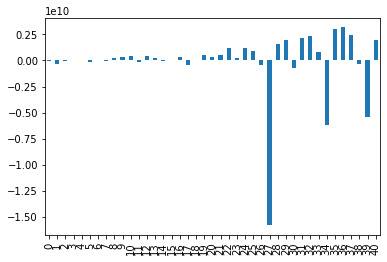

In [57]:
df_final['diff'].plot(kind='bar',x='Calendar_Year')
